In [26]:
!pip install openpyxl

In [27]:
import openpyxl

In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
df=pd.read_excel('data.csv.xlsx')
df.to_csv('data.csv',index=False)

In [30]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

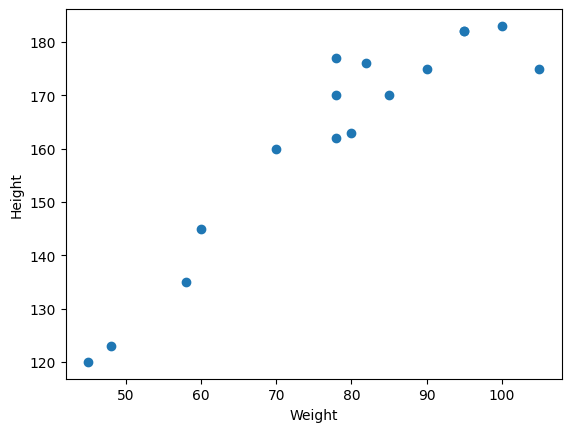

In [31]:
##Scatter plot 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [32]:
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


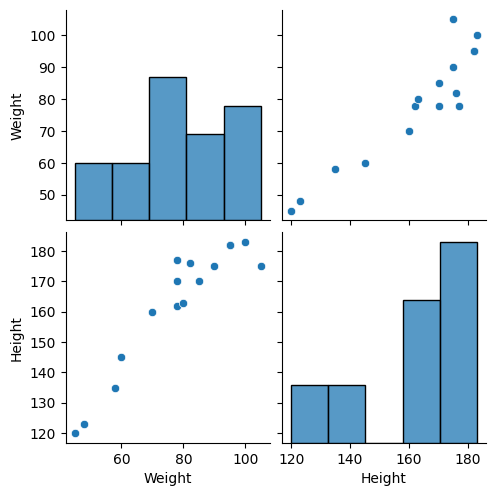

In [33]:
##Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [34]:
X = df[['Weight']]
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [35]:
##Independent and dependent features
X = df[['Weight']] ##Indepedent feature
y=df['Height'] #this variable can be in series or 1d array


In [36]:
X_series=df['Weight']
np.array(X_series).shape

(16,)

In [37]:
np.array(y).shape

(16,)

In [38]:
!pip install scikit-learn

In [39]:
import sklearn
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [41]:
X_train.shape

(12, 1)

In [42]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Why do we use fit_trasform?


fit() : calculates mean and std dev


transform() : scales calculated mean and std dev 
using fit()


fit_transform() : does both 

In [44]:
X_test = scaler.transform(X_test)

In [45]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [47]:
##Apply simple linear regression
from sklearn.linear_model import LinearRegression

In [51]:
regression = LinearRegression(n_jobs=-1)

In [52]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [56]:
print("Coefficient or slope : ",regression.coef_)
print("Intercept : ",regression.intercept_)

Coefficient or slope :  [15.34724528]
Intercept :  167.58333333333334


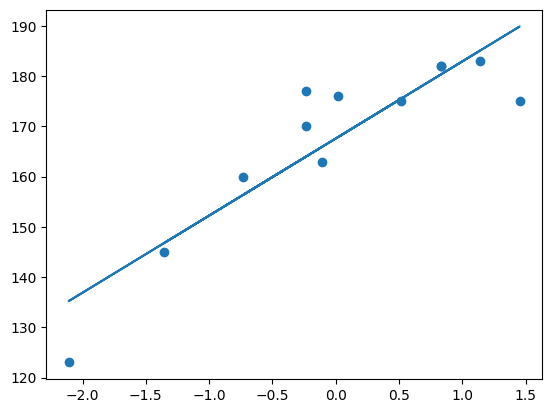

In [59]:
##Plot training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

**Prediction of test data**
1. Predicted height output =  intercept + coef_(Weights)
2. y_pred_test = 167.583 + 15.34(X_test)

In [60]:
##Prediction for test data
y_pred=regression.predict(X_test)

In [61]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [62]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

63.27506336142847
6.210844108319108
7.954562424258701


**R Square Formula**

R^2=1-SSR/SST

R^2=Coefficient of determination SSR = Sum of squares of residuals SST = Total sum of squares

In [63]:
from sklearn.metrics import r2_score

In [64]:
score=r2_score(y_test,y_pred)
print(score)

0.8444135525153134


**Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

where: 

R2:The R2 of the model n:The number of observations k: The number of predictor variables

In [66]:
##Display adjusted R squared
1 - (1 - score)*(len(y_test)-1)-(len(y_test)-X_test.shape[1]-1)

-1.46675934245406

In [68]:

!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.8 MB 1.7 MB/s eta 0:00:06
   ------ --------------------------------- 1.6/9.8 MB 1.9 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.8 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.6/9.8 MB 2.1 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.8 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.4 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.8 MB 2.6 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 2.7 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 2.6 MB/s eta 0:00:02
   --------------------------- --

In [69]:
##OLS linear regression
import statsmodels.api as sm

In [70]:
model=sm.OLS(y_train,X_train).fit()

In [71]:
prediction=model.predict(X_test)
print(prediction)

[-35.2378019  -22.77272912  -3.59569407   3.1162682 ]


In [72]:
print(model.summary())

c:\Users\admin\Desktop\Lipita.ipynb\myenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.082
Method:                 Least Squares   F-statistic:                            0.09207
Date:                Sun, 23 Feb 2025   Prob (F-statistic):                       0.767
Time:                        17:23:25   Log-Likelihood:                         -78.497
No. Observations:                  12   AIC:                                      159.0
Df Residuals:                      11   BIC:                                      159.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [74]:
##Prediction for new data
regression.predict(scaler.transform([[72]]))

c:\Users\admin\Desktop\Lipita.ipynb\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.23452875])